In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\Chitikela Gunasekhar\Downloads\archive (1)\haberman.csv")
print(df)

     30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
..   ..  ..  ..  ...
300  75  62   1    1
301  76  67   0    1
302  77  65   3    1
303  78  65   1    2
304  83  58   2    2

[305 rows x 4 columns]


In [6]:
df.columns= ['Age','Year_of_operation','No_of_Auxil_Nodes','survical_status']

In [7]:
df

,Age,Year_of_operation,No_of_Auxil_Nodes,survical_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [8]:
df.shape

(305, 4)

In [9]:
df.columns

Index(['Age', 'Year_of_operation', 'No_of_Auxil_Nodes', 'survical_status'], dtype='object')

In [10]:
df.shape

(305, 4)

In [11]:
df['Age'].dtype

dtype('int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                305 non-null    int64
 1   Year_of_operation  305 non-null    int64
 2   No_of_Auxil_Nodes  305 non-null    int64
 3   survical_status    305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [13]:
df.isnull().sum()

Age                  0
Year_of_operation    0
No_of_Auxil_Nodes    0
survical_status      0
dtype: int64

# 📊 General Data Understanding

## Q1. What is the shape of the dataset? How many rows and columns does it have?

In [14]:
df.shape

(305, 4)

In [15]:
# Check for rows
df.shape[0]

305

In [16]:
# check for no. of columns
df.shape[1]

4

### Observation
- shape of dataset is **`(305,4)`**
- Total **`305`** rows are present in this dataset
- Total **`4`** columns are present in this dataset

In [ ]:
# This is first line comment
## This is second line
### This is third line 

## Q2. What are the data types of each column? Are they appropriate?

In [24]:
df['Age'].dtype

dtype('int64')

In [18]:
df['Year_of_operation'].dtype

dtype('int64')

In [19]:
df['No_of_Auxil_Nodes'].dtype

dtype('int64')

In [20]:
df['survical_status'].dtype

dtype('int64')

## Observation
- Data type of **`Age`** is **`int`**
- Data type of **`year of operation`** is **`int`**
- Data type of **`No of Auxil Nodes`** is **`int`**
- Data type of **`Survical Status`** is **`int`**

## Q3. Are there any missing values or anomalies in the data?

In [26]:
df.isnull().sum()

Age                  0
Year_of_operation    0
No_of_Auxil_Nodes    0
survical_status      0
dtype: int64

## Obervation
- All the Values are **`0`**, there are no missing values.

## Q4. What is the distribution of the target variable (Survival Status)? Is the dataset imbalanced?

In [28]:
df.iloc[:,-1].value_counts()

survical_status
1    224
2     81
Name: count, dtype: int64

In [31]:
df['survical_status'].value_counts(normalize=True)

survical_status
1    0.734426
2    0.265574
Name: proportion, dtype: float64

## Obervation
- **`225`** patients survived, **`81`** died
- On analyzing the data, i observe that about **`73.5%`** of the patients belong to class **`1`**, and only **`26.5%`** belong to class **`2`**

# Q5.What is the mean age of the patients using NumPy?

In [33]:
ages = df['Age'].values
np.mean(ages)

np.float64(52.5311475409836)

## Obervation
- Average age of the patients are **`53`**

# Q6.What is the standard deviation of positive axillary nodes?

In [35]:
np.std(df['No_of_Auxil_Nodes'].values)

np.float64(7.187558302814372)

## Obervation
- Standard deviation of No of Auxil Nodes are **`7.18`**

# Q7.How many patients are older than the average age?

In [36]:
np.sum(df['Age'].values > np.mean(df['Age'].values))

np.int64(150)

## Obervation
- Patients are older than the average age is **`150`**

# PANDAS

## Q8.How many patients are in the dataset?

In [37]:
df.shape[0]

305

### Obervation
- Patients are in the dataset are **`305`**

## Q9.Show the first 5 records of the dataset.

In [38]:
df.head()

,Age,Year_of_operation,No_of_Auxil_Nodes,survical_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


### Observation
- **`First 5`** records of the dataset

## Q10.What is the average number of nodes for each survival status?

In [43]:
df.groupby('survical_status')['No_of_Auxil_Nodes'].mean()

survical_status
1    2.799107
2    7.456790
Name: No_of_Auxil_Nodes, dtype: float64

### Observation
- Patients who **`suervived 5 years or more (status = 1)`** had an **`average of ~2.79`** positive axillary nodes
- Patients who **`died within 5 years (status = 2)`** had an **`average of ~7.46`** positive axillary lymph nodes

## Q11. Which year had the most surgeries?

In [45]:
df['Year_of_operation'].value_counts().idxmax()

np.int64(58)

### Observation
- A Peak in cancer detection in **`1958`** year

## Q12.Filter patients who had more than 5 nodes and survived more than 5 years.

In [50]:
df[(df['No_of_Auxil_Nodes'] > 5) & (df['survical_status']==1)]

,Age,Year_of_operation,No_of_Auxil_Nodes,survical_status
4,33,58,10,1
8,34,58,30,1
10,34,61,10,1
11,34,67,7,1
13,35,64,13,1
20,37,59,6,1
21,37,60,15,1
30,38,66,11,1
46,41,59,8,1
49,41,69,8,1


## Observation
- This filtered subset shows patients who had a **`moderate to high number of cancer affected lymph nodes`**, yet still **`survived at least 5 years`** after surgery

# Matplotlib

## Q13. Plot a histogram of patient ages.

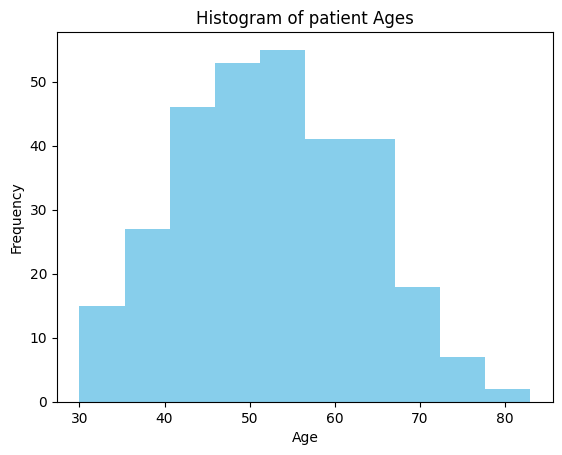

In [51]:
plt.hist(df['Age'], bins=10, color = 'skyblue')
plt.title("Histogram of patient Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Observation
- The Age of patients generally ranges from around 30 to 80 years

## Q14. Plot a bar chart of number of surgeries per year.

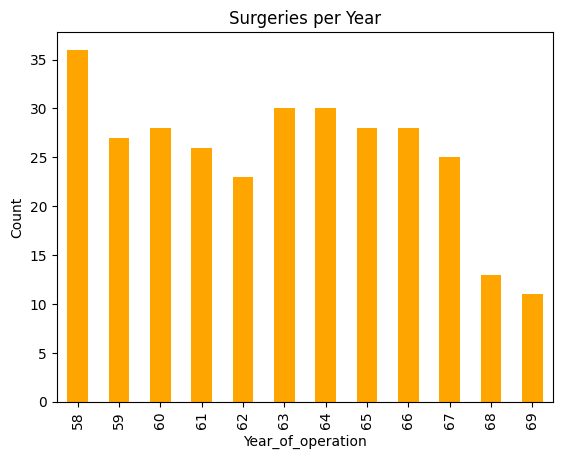

In [52]:
df['Year_of_operation'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Surgeries per Year")
plt.xlabel("Year_of_operation")
plt.ylabel("Count")
plt.show()

### Observation
- Surgeries were recorded between 1958 and 1969.

## 15. Plot a scatter plot between age and nodes

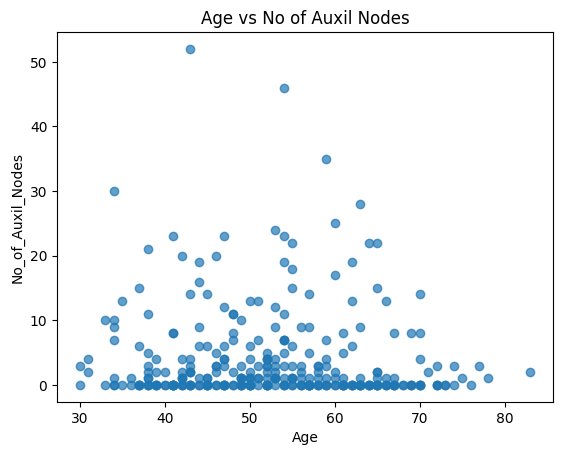

In [54]:
plt.scatter(df['Age'],df['No_of_Auxil_Nodes'],alpha=0.7)
plt.title("Age vs No of Auxil Nodes")
plt.xlabel("Age")
plt.ylabel("No_of_Auxil_Nodes")
plt.show()

### Observation
- The Scatter plot shows the relationship between patient age and the number of positive axillary lymph nodes.

# SEABORN

## 16.Use seaborn to plot a boxplot of nodes by survival status

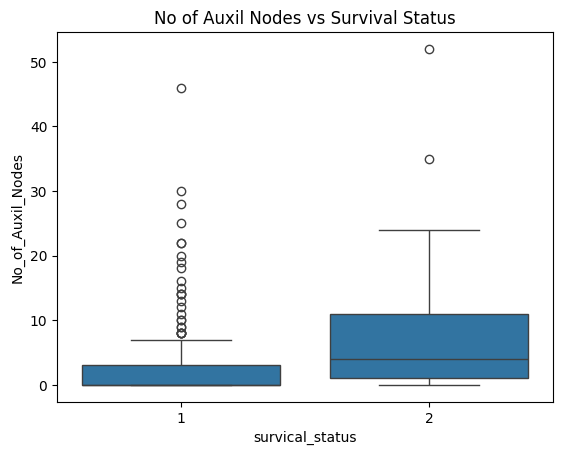

In [58]:
sns.boxplot(x='survical_status',y='No_of_Auxil_Nodes',data=df)
plt.title("No of Auxil Nodes vs Survival Status")
plt.show()

### Observation
- Patients who survived (status = 1) generally had fewer positive nodes, with a median around 0-1 nodes
- Patients who died within 5 years (status = 2) had a much higher spread, with a higher median and more outliers
- The Plot shows that higher node counts are strongly associated with lower survival

## 17. Use pairplot to visualize relationships between all numeric features.

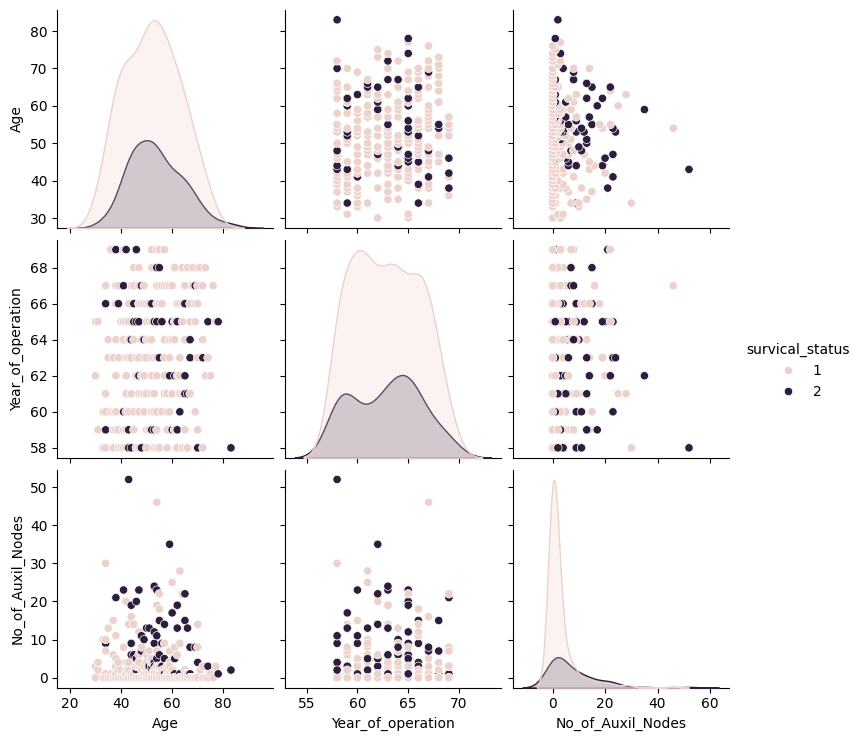

In [59]:
sns.pairplot(df,hue='survical_status')
plt.show()

### Observation
- Age vs Nodes: Patients with fewer nodes (esp. near 0) mostly belong to status 1 (survived).
-  Year of operation does not show a strong pattern related to survival.
-  Age is fairly spread out for both statuses, but younger patients may slightly lean toward higher survival
-  The clearest separation is between nodes and status — patients with many positive nodes tend to have lower survival.

## 18. Plot a heatmap of correlation between columns

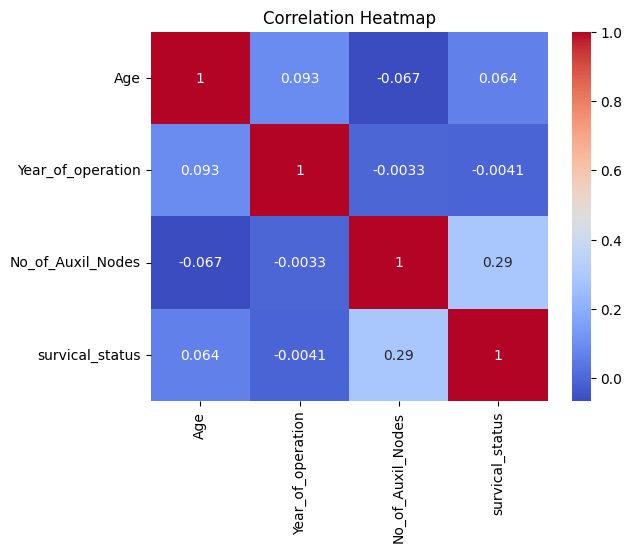

In [64]:
sns.heatmap(df.corr(), annot=True , cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

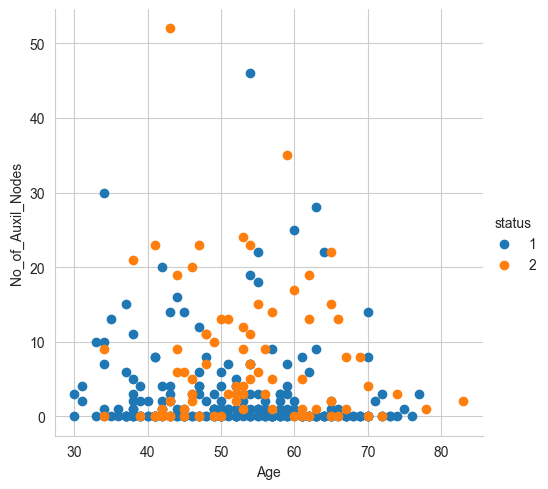

In [68]:
df.rename(columns={'survical_status':'status'},inplace=True)
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="status",height = 5).map(plt.scatter,"Age","No_of_Auxil_Nodes").add_legend();
plt.show()

### Observation
- Patients with fewer positive axillary lymph nodes tend to have better survival (status = 1), while higher node counts are associated with poorer survival (status = 2); age shows no clear separation between survival groups.